In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.style.use('seaborn')

In [7]:
#iris = pd.read_csv("iris.csv")
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='FlowerType')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


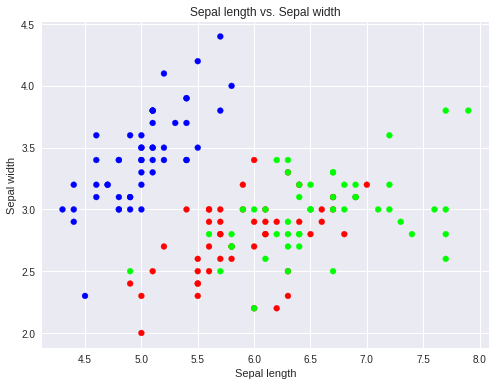

In [8]:
plt.figure(4, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], s=35, c=y, cmap=plt.cm.brg)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal length vs. Sepal width')
plt.show()

In [11]:
#iris
dataset=pd.read_csv("iris.csv")
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Standardize the Data**

In [18]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
#features = ['sepal length (cm)', 	'sepal width (cm)', 	'petal length (cm)', 	'petal width (cm)']
x = dataset.loc[:, features].values

In [19]:
y = dataset.loc[:,['species']].values

In [20]:
x = StandardScaler().fit_transform(x)

In [21]:
pd.DataFrame(data = x, columns = features).head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [22]:
#PCA Projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [23]:
dataset[['species']].head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [25]:
finalDf = pd.concat([principalDf, dataset[['species']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


**Visualize 2D Projection**

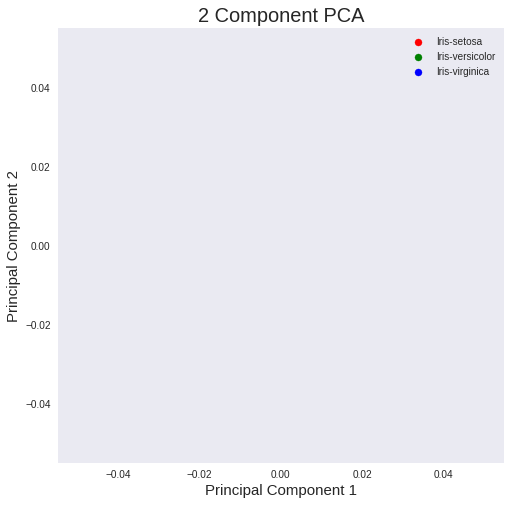

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for variety, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == variety
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [28]:
#Explained Variance:The explained variance tells us how much information (variance) 
#can be attributed to each of the principal components.
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])